# <b><span style='color:#F1A424'>AutoML - Multi-Class Classification </span> </b>

## <b> Problem overview:</b>
    


The Iris dataset is a classic dataset in the field of machine learning and statistics.It contains measurements of various features of iris flowers, making it a quintessential dataset for practicing classification algorithms and statistical analysis.

Here are some key details about the Iris dataset:

**Features**:

- `Sepal Length (cm)`: Measurement of the length of the outermost petal parts (sepals).
- `Sepal Width (cm)`: Measurement of the width of the sepals.
- `Petal Length (cm)`: Measurement of the length of the innermost petal parts (petals).
- `Petal Width (cm)`: Measurement of the width of the petals.

**Target Variable**:

- `Species`: The species of iris flowers. It includes three classes: `Setosa`, `Versicolor` and `Virginica`.

        
**Objective**:

The primary objective is typically to build a model that can accurately classify iris flowers into one of the three species based on the provided features.

**Challenges**:

- The dataset consists of 150 instances, with 50 instances for each of the three classes.

**Usecase**:
Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Train test split with training size 0.85.
- Data imbalance handling with 'SMOTE' method.
- Feature scaling with 'range' method.
- Addition of customized value in hyperparameter 'max_depth' for 'xgboost' model.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [5]:
# Loading dataset from example data collection
load_example_data("teradataml", "iris_input")

In [6]:
# Fetching in teradata dataframe
iris = DataFrame.from_table("iris_input")

In [7]:
# first 5 rows
iris.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
3,4.7,3.2,1.3,0.2,1
5,5.0,3.6,1.4,0.2,1
6,5.4,3.9,1.7,0.4,1
7,4.6,3.4,1.4,0.3,1
9,4.4,2.9,1.4,0.2,1
10,4.9,3.1,1.5,0.1,1
8,5.0,3.4,1.5,0.2,1
4,4.6,3.1,1.5,0.2,1
2,4.9,3.0,1.4,0.2,1
1,5.1,3.5,1.4,0.2,1


In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
iris_sample = iris.sample(frac = [0.8, 0.2])

In [9]:
iris_sample.head()

id,sepal_length,sepal_width,petal_length,petal_width,species,sampleid
3,4.7,3.2,1.3,0.2,1,2
5,5.0,3.6,1.4,0.2,1,1
6,5.4,3.9,1.7,0.4,1,1
7,4.6,3.4,1.4,0.3,1,1
9,4.4,2.9,1.4,0.2,1,1
10,4.9,3.1,1.5,0.1,1,2
8,5.0,3.4,1.5,0.2,1,2
4,4.6,3.1,1.5,0.2,1,1
2,4.9,3.0,1.4,0.2,1,1
1,5.1,3.5,1.4,0.2,1,1


In [10]:
# Fetching train and test data
iris_train= iris_sample[iris_sample['sampleid'] == 1].drop('sampleid', axis=1)
iris_test = iris_sample[iris_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
iris_train.shape

(120, 6)

In [12]:
# test data shape
iris_test.shape

(30, 6)

In [13]:
#train dataset
iris_train.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
4,4.6,3.1,1.5,0.2,1
6,5.4,3.9,1.7,0.4,1
7,4.6,3.4,1.4,0.3,1
9,4.4,2.9,1.4,0.2,1
12,4.8,3.4,1.6,0.2,1
13,4.8,3.0,1.4,0.1,1
11,5.4,3.7,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
1,5.1,3.5,1.4,0.2,1


In [14]:
# test dataset
iris_test.head()

id,sepal_length,sepal_width,petal_length,petal_width,species
10,4.9,3.1,1.5,0.1,1
21,5.4,3.4,1.7,0.2,1
25,4.8,3.4,1.9,0.2,1
32,5.4,3.4,1.5,0.4,1
41,5.0,3.5,1.3,0.3,1
44,5.0,3.5,1.6,0.6,1
38,4.9,3.6,1.4,0.1,1
19,5.7,3.8,1.7,0.3,1
8,5.0,3.4,1.5,0.2,1
3,4.7,3.2,1.3,0.2,1


In [15]:
iris_test.head(30)

id,sepal_length,sepal_width,petal_length,petal_width,species
10,4.9,3.1,1.5,0.1,1
21,5.4,3.4,1.7,0.2,1
25,4.8,3.4,1.9,0.2,1
32,5.4,3.4,1.5,0.4,1
41,5.0,3.5,1.3,0.3,1
44,5.0,3.5,1.6,0.6,1
47,5.1,3.8,1.6,0.2,1
54,5.5,2.3,4.0,1.3,2
57,6.3,3.3,4.7,1.6,2
64,6.1,2.9,4.7,1.4,2


In [16]:
AutoClassifier.generate_custom_config("custom_iris")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  1,2,4



Customizing Train Test Split ...



Enter the train size for train test split:  0.85



Customization of train test split has been completed successfully.

Customizing Data Imbalance Handling ...

Available data sampling methods with corresponding indices:
Index 1: SMOTE
Index 2: NearMiss



Enter the corresponding index data imbalance handling method:  1



Customization of data imbalance handling has been completed successfully.

Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  4



Customization of feature scaling has been completed successfully.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  5



Customization of data preparation phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  3



Customizing Model Training Phase ...

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  1



Customizing Model Hyperparameter ...

Available models for hyperparameter tuning with corresponding indices:
Index 1: decision_forest
Index 2: xgboost
Index 3: knn
Index 4: glm
Index 5: svm

Available hyperparamters update methods with corresponding indices:
Index 1: ADD
Index 2: REPLACE



Enter the list of model indices for performing hyperparameter tuning:  2



Available hyperparameters for model 'xgboost' with corresponding indices:
Index 1: min_impurity
Index 2: max_depth
Index 3: min_node_size
Index 4: shrinkage_factor
Index 5: iter_num



Enter the list of hyperparameter indices for model 'xgboost':  2

Enter the index of corresponding update method for hyperparameters 'max_depth' for model 'xgboost':  1

Enter the list of value for hyperparameter 'max_depth' for model 'xgboost':  3,4



Customization of model hyperparameter has been completed successfully.

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  3



Customization of model training phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_iris.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [17]:
# Creating AutoClassifier instance
# Including xgboost model from default model list for training.
# Using early stopping timer criteria with value 300 sec.
# Passing custom json file to provide customized value for AutoML.

aml = AutoClassifier(include=['xgboost'],
                     verbose=2,
                     max_runtime_secs=300,
                     custom_config_file='custom_iris.json')


 Received below input for customization : 
{
    "TrainTestSplitIndicator": true,
    "TrainingSize": 0.85,
    "DataImbalanceIndicator": true,
    "DataImbalanceMethod": "SMOTE",
    "FeatureScalingIndicator": true,
    "FeatureScalingMethod": "range",
    "HyperparameterTuningIndicator": true,
    "HyperparameterTuningParam": {
        "xgboost": {
            "max_depth": {
                "Method": "ADD",
                "Value": [
                    3,
                    4
                ]
            }
        }
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 120
Total Columns in the data: 6

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
species,INTEGER,120,0,None,0,120,0,0.0,100.0
sepal_width,FLOAT,120,0,None,0,120,0,0.0,100.0
petal_length,FLOAT,120,0,None,0,120,0,0.0,100.0
id,INTEGER,120,0,None,0,120,0,0.0,100.0
petal_width,FLOAT,120,0,None,0,120,0,0.0,100.0
sepal_length,FLOAT,120,0,None,0,120,0,0.0,100.0



Statistics of Data:


func,id,sepal_length,sepal_width,petal_length,petal_width,species
std,44.302,0.857,0.444,1.797,0.774,0.834
25%,38.5,5.1,2.8,1.5,0.3,1
50%,79.5,5.8,3,4.45,1.35,2
75%,116.25,6.425,3.3,5.2,1.9,3
max,150,7.9,4.4,6.9,2.5,3
min,1,4.3,2,1,0.1,1
mean,77.433,5.869,3.046,3.817,1.228,2.042
count,120,120,120,120,120,120



Target Column Distribution:


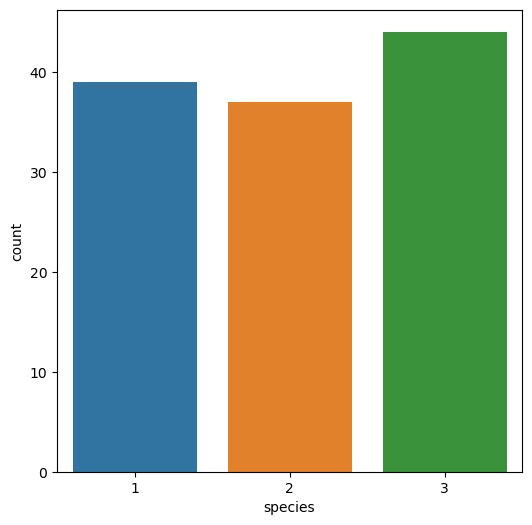

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width           3.333333


Analysis complete. No action taken.                                                     


Dataset does not contain any feature related to dates.                                   


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


No Missing Values Detected.                                                              


No imputation is Required.                                                               


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 26% - 5/19


AutoML will proceed with default encoding technique.                                     


Encoding not required.                                                                   


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Skipping customized anti-select columns.                                                 


Training size : 0.85                                                                      
Testing size  : 0.15                                                                      


sepal_length,sepal_width,petal_length,petal_width,species,id
5.1,3.4,1.5,0.2,1,10
5.1,2.5,3.0,1.1,2,13
6.4,2.7,5.3,1.9,3,21
6.3,3.3,6.0,2.5,3,9
5.7,2.9,4.2,1.3,2,15
5.8,4.0,1.2,0.2,1,23
5.7,2.6,3.5,1.0,2,12
7.7,3.8,6.7,2.2,3,20
5.6,2.8,4.9,2.0,3,11
6.6,2.9,4.6,1.3,2,19


sepal_length,sepal_width,petal_length,petal_width,species,id
6.5,2.8,4.6,1.5,2,28
5.5,2.4,3.7,1.0,2,130
5.3,3.7,1.5,0.2,1,29
6.5,3.0,5.5,1.8,3,45
6.0,2.9,4.5,1.5,2,111
5.0,3.2,1.2,0.2,1,30
6.3,2.5,5.0,1.9,3,110
6.4,2.8,5.6,2.2,3,31
6.7,2.5,5.8,1.8,3,100
4.3,3.0,1.1,0.1,1,99


No information provided for customized outlier processing. AutoML will proceed with default settings.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
    ColumnName  OutlierPercentage
0  sepal_width           3.333333


['sepal_width']
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711274104397699"'/19


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711274940659712"'/19
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711274995238569"'


['sepal_width', 'petal_length', 'sepal_length', 'petal_width']


['sepal_width', 'petal_length', 'sepal_length', 'petal_width']


species,id,sepal_width,petal_length,sepal_length,petal_width
1,92,0.6666666666666666,0.035087719298245605,0.2285714285714285,0.04166666666666667
1,33,0.44444444444444436,0.035087719298245605,0.11428571428571413,0.0
3,70,0.22222222222222218,1.0,0.9428571428571428,0.9166666666666666
1,23,1.0,0.0,0.39999999999999986,0.04166666666666667
1,49,0.3888888888888888,0.035087719298245605,0.0,0.04166666666666667
3,78,0.33333333333333315,0.6842105263157894,0.39999999999999986,0.9583333333333333
3,81,0.33333333333333315,0.9649122807017544,0.9428571428571428,0.7916666666666666
3,20,0.8888888888888887,0.9649122807017544,0.9428571428571428,0.8750000000000001
3,106,0.6666666666666666,0.7368421052631579,0.5142857142857142,0.9166666666666666
1,56,0.7222222222222222,0.035087719298245605,0.1999999999999998,0.04166666666666667


species,id,sepal_width,petal_length,sepal_length,petal_width
1,135,0.7777777777777778,-0.035087719298245605,0.05714285714285694,0.04166666666666667
1,116,0.44444444444444436,0.035087719298245605,0.11428571428571413,0.08333333333333333
3,45,0.44444444444444436,0.7543859649122806,0.5999999999999999,0.7083333333333334
1,29,0.8333333333333334,0.052631578947368425,0.257142857142857,0.04166666666666667
1,99,0.44444444444444436,-0.017543859649122782,-0.028571428571428723,0.0
3,100,0.16666666666666657,0.8070175438596491,0.6571428571428571,0.7083333333333334
3,31,0.33333333333333315,0.7719298245614034,0.5714285714285714,0.8750000000000001
3,108,0.44444444444444436,0.6491228070175439,0.4857142857142855,0.7083333333333334
3,134,0.44444444444444436,0.8245614035087719,0.7714285714285712,0.8333333333333334
1,30,0.5555555555555556,0.0,0.17142857142857132,0.04166666666666667


['petal_length', 'petal_width']


['r_petal_length', 'r_petal_width']


species,id,r_petal_length,r_petal_width
1,92,0.035087719298245605,0.04166666666666667
1,33,0.035087719298245605,0.0
3,70,1.0,0.9166666666666666
1,23,0.0,0.04166666666666667
1,49,0.035087719298245605,0.04166666666666667
3,78,0.6842105263157894,0.9583333333333333
3,81,0.9649122807017544,0.7916666666666666
3,20,0.9649122807017544,0.8750000000000001
3,106,0.7368421052631579,0.9166666666666666
1,56,0.035087719298245605,0.04166666666666667


species,id,r_petal_length,r_petal_width
1,135,-0.035087719298245605,0.04166666666666667
1,116,0.035087719298245605,0.08333333333333333
3,45,0.7543859649122806,0.7083333333333334
1,29,0.052631578947368425,0.04166666666666667
1,99,-0.017543859649122782,0.0
3,100,0.8070175438596491,0.7083333333333334
3,31,0.7719298245614034,0.8750000000000001
3,108,0.6491228070175439,0.7083333333333334
3,134,0.8245614035087719,0.8333333333333334
1,30,0.0,0.04166666666666667


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


species,id,sepal_length,sepal_width,petal_length,petal_width
3,42,0.5142857142857142,0.33333333333333315,0.631578947368421,0.7083333333333334
1,17,0.2857142857142857,0.9444444444444444,0.017543859649122823,0.12500000000000003
2,35,0.4857142857142855,0.33333333333333315,0.6140350877192983,0.4583333333333333
3,36,0.4857142857142855,0.22222222222222218,0.7719298245614034,0.5416666666666666
2,39,0.7428571428571428,0.5555555555555556,0.6140350877192983,0.5416666666666666
3,128,0.7999999999999999,0.44444444444444436,0.8070175438596491,0.625
3,105,0.5714285714285714,0.5,0.7543859649122806,0.7083333333333334
3,86,0.5428571428571427,0.33333333333333315,0.6842105263157894,0.5833333333333334
3,87,0.5428571428571427,0.3888888888888888,0.7719298245614034,0.7083333333333334
3,136,0.6571428571428571,0.6111111111111109,0.7894736842105263,1.0


species,id,sepal_length,sepal_width,petal_length,petal_width
1,29,0.257142857142857,0.8333333333333334,0.052631578947368425,0.04166666666666667
2,28,0.5999999999999999,0.33333333333333315,0.5964912280701753,0.5833333333333334
3,100,0.6571428571428571,0.16666666666666657,0.8070175438596491,0.7083333333333334
1,30,0.17142857142857132,0.5555555555555556,0.0,0.04166666666666667
2,130,0.31428571428571417,0.11111111111111098,0.43859649122807015,0.375
3,31,0.5714285714285714,0.33333333333333315,0.7719298245614034,0.8750000000000001
2,111,0.457142857142857,0.3888888888888888,0.5789473684210525,0.5833333333333334
3,110,0.5428571428571427,0.16666666666666657,0.6666666666666666,0.75
3,45,0.5999999999999999,0.44444444444444436,0.7543859649122806,0.7083333333333334
1,99,-0.028571428571428723,0.44444444444444436,-0.017543859649122782,0.0


['col_0', 'col_1']


                                                                                          
Completed customized hyperparameter update.


response_column : species                                                                                                                             
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.2)
max_depth : (3, 4, 5, 6, 7, 8)
min_node_size : (1, 2)
iter_num : (10, 20)
Total number of models for xgboost : 1152
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



XGBOOST_0                                                                                                                                                                                               
XGBOOST_7                                                                                 
XGBOOST_2                                                                                 


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
1,2,xgboost,lasso,0.277778,0.277778,0.277778,0.277778,0.092593,0.333333,0.144928,0.07716,0.277778,0.120773
2,3,xgboost,rfe,0.277778,0.277778,0.277778,0.277778,0.092593,0.333333,0.144928,0.07716,0.277778,0.120773


In [18]:
# Fitting train data
aml.fit(iris_train, iris_train.species)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [19]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
1,2,xgboost,lasso,0.277778,0.277778,0.277778,0.277778,0.092593,0.333333,0.144928,0.07716,0.277778,0.120773
2,3,xgboost,rfe,0.277778,0.277778,0.277778,0.277778,0.092593,0.333333,0.144928,0.07716,0.277778,0.120773


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [20]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [21]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

xgboost pca

 Prediction : 
   species   id  Prediction  Confidence_Lower  Confidence_upper
0        2   28           2             0.625             0.625
1        1   30           1             1.000             1.000
2        3   31           3             1.000             1.000
3        1   99           1             1.000             1.000
4        3   45           3             0.875             0.875
5        3  110           3             0.750             0.750
6        3  100           3             0.750             0.750
7        1   29           1             1.000             1.000
8        3   27           3             0.875             0.875
9        2  130           2             0.875             0.875

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  Precision  Recall   F1  Support
SeqNum                                                                                
2               3  CLASS_3        0        0        7        1.0     

array([[5, 0, 0],
       [0, 6, 0],
       [0, 0, 7]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

species,id,Prediction,Confidence_Lower,Confidence_upper
1,135,1,1.0,1.0
1,29,1,1.0,1.0
2,101,2,0.875,0.875
2,28,2,0.625,0.625
2,111,2,0.625,0.625
2,118,2,0.75,0.75
2,115,2,0.625,0.625
1,99,1,1.0,1.0
1,30,1,1.0,1.0
1,116,1,1.0,1.0


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [23]:
# Generating prediction and metrics on test data
prediction = aml.predict(iris_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...

Updated dataset after dropping irrelevent columns :


sepal_length,sepal_width,petal_length,petal_width,species
4.9,3.6,1.4,0.1,1
5.6,2.7,4.2,1.3,2
5.0,3.5,1.3,0.3,1
5.8,2.6,4.0,1.2,2
4.7,3.2,1.3,0.2,1
5.5,2.3,4.0,1.3,2
6.7,3.0,5.0,1.7,2
6.0,3.0,4.8,1.8,3
5.6,3.0,4.1,1.3,2
6.1,2.9,4.7,1.4,2



Updated dataset after performing target column transformation :


sepal_length,sepal_width,id,petal_length,petal_width,species
5.7,3.8,11,1.7,0.3,1
5.8,2.6,8,4.0,1.2,2
5.0,3.4,16,1.5,0.2,1
5.6,2.7,13,4.2,1.3,2
6.3,3.3,10,4.7,1.6,2
7.2,3.6,18,6.1,2.5,3
6.7,3.0,15,5.0,1.7,2
6.0,3.0,23,4.8,1.8,3
4.7,3.2,14,1.3,0.2,1
5.5,2.3,22,4.0,1.3,2


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711276869963041"'

Updated dataset after performing Lasso feature selection:


id,sepal_width,petal_length,sepal_length,petal_width,species
21,3.5,1.3,5.0,0.3,1
35,3.4,1.7,5.4,0.2,1
14,3.2,1.3,4.7,0.2,1
30,3.5,1.6,5.0,0.6,1
12,3.6,1.4,4.9,0.1,1
39,3.1,1.5,4.9,0.1,1
18,3.6,6.1,7.2,2.5,3
25,2.7,5.1,5.8,1.9,3
38,2.7,4.9,6.3,1.8,3
34,3.0,5.8,6.5,2.2,3



Updated dataset after performing scaling on Lasso selected features :


species,id,sepal_width,petal_length,sepal_length,petal_width
1,21,0.7222222222222222,0.017543859649122823,0.17142857142857132,0.08333333333333333
1,35,0.6666666666666666,0.08771929824561403,0.2857142857142857,0.04166666666666667
1,14,0.5555555555555556,0.017543859649122823,0.08571428571428566,0.04166666666666667
1,30,0.7222222222222222,0.07017543859649125,0.17142857142857132,0.20833333333333334
1,12,0.7777777777777778,0.035087719298245605,0.14285714285714285,0.0
1,39,0.5,0.052631578947368425,0.14285714285714285,0.0
3,18,0.7777777777777778,0.8596491228070174,0.7999999999999999,1.0
3,25,0.2777777777777778,0.6842105263157894,0.39999999999999986,0.75
3,38,0.2777777777777778,0.6491228070175439,0.5428571428571427,0.7083333333333334
3,34,0.44444444444444436,0.8070175438596491,0.5999999999999999,0.8750000000000001



Updated dataset after performing RFE feature selection:


id,petal_length,petal_width,species
21,1.3,0.3,1
35,1.7,0.2,1
14,1.3,0.2,1
30,1.6,0.6,1
12,1.4,0.1,1
39,1.5,0.1,1
18,6.1,2.5,3
25,5.1,1.9,3
38,4.9,1.8,3
34,5.8,2.2,3



Updated dataset after performing scaling on RFE selected features :


species,id,r_petal_length,r_petal_width
3,38,0.6491228070175439,0.7083333333333334
3,23,0.631578947368421,0.7083333333333334
3,32,0.8421052631578947,0.7083333333333334
1,24,0.12280701754385964,0.04166666666666667
1,21,0.017543859649122823,0.08333333333333333
1,11,0.08771929824561403,0.08333333333333333
1,35,0.08771929824561403,0.04166666666666667
1,14,0.017543859649122823,0.04166666666666667
1,30,0.07017543859649125,0.20833333333333334
1,27,0.07017543859649125,0.04166666666666667



Updated dataset after performing scaling for PCA feature selection :


species,id,sepal_length,sepal_width,petal_length,petal_width
3,38,0.5428571428571427,0.2777777777777778,0.6491228070175439,0.7083333333333334
3,23,0.457142857142857,0.44444444444444436,0.631578947368421,0.7083333333333334
3,32,0.7999999999999999,0.5555555555555556,0.8421052631578947,0.7083333333333334
1,24,0.11428571428571413,0.6666666666666666,0.12280701754385964,0.04166666666666667
1,21,0.17142857142857132,0.7222222222222222,0.017543859649122823,0.08333333333333333
1,11,0.3714285714285714,0.8888888888888887,0.08771929824561403,0.08333333333333333
1,35,0.2857142857142857,0.6666666666666666,0.08771929824561403,0.04166666666666667
1,14,0.08571428571428566,0.5555555555555556,0.017543859649122823,0.04166666666666667
1,30,0.17142857142857132,0.7222222222222222,0.07017543859649125,0.20833333333333334
1,27,0.1999999999999998,0.8888888888888887,0.07017543859649125,0.04166666666666667



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,species
0,24,-0.662048,0.080712,1
1,18,0.681951,0.419969,3
2,31,-0.577049,0.147195,1
3,25,0.318190,-0.188041,3
4,21,-0.684797,0.157748,1
5,38,0.334287,-0.134925,3
6,11,-0.578423,0.383345,1
7,34,0.535187,0.037187,3
8,35,-0.607202,0.144826,1
9,23,0.258428,-0.010735,3


Data Transformation completed.
xgboost pca

 Prediction : 
   species  id  Prediction  Confidence_Lower  Confidence_upper
0        1  31           1             1.000             1.000
1        1  21           1             1.000             1.000
2        3  38           3             0.625             0.625
3        1  11           1             1.000             1.000
4        1  35           1             1.000             1.000
5        3  23           2             0.625             0.625
6        3  34           3             1.000             1.000
7        3  25           2             0.500             0.500
8        3  18           3             1.000             1.000
9        1  24           1             1.000             1.000

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  Precision    Recall        F1  Support
SeqNum                                                                                       
2               3  CLASS_3        0

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  2,  4]], dtype=int64)

In [24]:
# Printing prediction
prediction.head()

species,id,Prediction,Confidence_Lower,Confidence_upper
1,16,1,1.0,1.0
1,35,1,1.0,1.0
1,31,1,1.0,1.0
1,14,1,1.0,1.0
1,30,1,1.0,1.0
1,39,1,1.0,1.0
1,27,1,1.0,1.0
1,11,1,1.0,1.0
1,21,1,1.0,1.0
1,12,1,1.0,1.0


In [25]:
# Generating prediction and metrics on test data
prediction = aml.predict(iris_test,2)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...

Updated dataset after dropping irrelevent columns :


sepal_length,sepal_width,petal_length,petal_width,species
5.6,3.0,4.1,1.3,2
6.7,3.0,5.0,1.7,2
6.0,3.0,4.8,1.8,3
5.6,2.7,4.2,1.3,2
6.3,3.3,4.7,1.6,2
7.2,3.6,6.1,2.5,3
4.9,3.6,1.4,0.1,1
6.7,3.1,4.4,1.4,2
4.7,3.2,1.3,0.2,1
5.5,2.3,4.0,1.3,2



Updated dataset after performing target column transformation :


sepal_length,sepal_width,id,petal_length,petal_width,species
5.6,3.0,9,4.1,1.3,2
5.7,3.8,11,1.7,0.3,1
5.6,2.5,19,3.9,1.1,2
4.7,3.2,14,1.3,0.2,1
4.9,3.6,12,1.4,0.1,1
6.7,3.1,20,4.4,1.4,2
6.7,3.0,15,5.0,1.7,2
6.0,3.0,23,4.8,1.8,3
6.3,3.3,10,4.7,1.6,2
7.2,3.6,18,6.1,2.5,3


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711274146776091"'

Updated dataset after performing Lasso feature selection:


id,sepal_width,petal_length,sepal_length,petal_width,species
39,3.1,1.5,4.9,0.1,1
30,3.5,1.6,5.0,0.6,1
16,3.4,1.5,5.0,0.2,1
11,3.8,1.7,5.7,0.3,1
35,3.4,1.7,5.4,0.2,1
24,3.4,1.9,4.8,0.2,1
32,3.2,6.0,7.2,1.8,3
38,2.7,4.9,6.3,1.8,3
25,2.7,5.1,5.8,1.9,3
23,3.0,4.8,6.0,1.8,3



Updated dataset after performing scaling on Lasso selected features :


species,id,sepal_width,petal_length,sepal_length,petal_width
3,25,0.2777777777777778,0.6842105263157894,0.39999999999999986,0.75
3,34,0.44444444444444436,0.8070175438596491,0.5999999999999999,0.8750000000000001
3,18,0.7777777777777778,0.8596491228070174,0.7999999999999999,1.0
1,12,0.7777777777777778,0.035087719298245605,0.14285714285714285,0.0
1,39,0.5,0.052631578947368425,0.14285714285714285,0.0
1,31,0.6666666666666666,0.052631578947368425,0.2857142857142857,0.12500000000000003
1,30,0.7222222222222222,0.07017543859649125,0.17142857142857132,0.20833333333333334
1,16,0.6666666666666666,0.052631578947368425,0.17142857142857132,0.04166666666666667
1,11,0.8888888888888887,0.08771929824561403,0.3714285714285714,0.08333333333333333
1,21,0.7222222222222222,0.017543859649122823,0.17142857142857132,0.08333333333333333



Updated dataset after performing RFE feature selection:


id,petal_length,petal_width,species
39,1.5,0.1,1
30,1.6,0.6,1
16,1.5,0.2,1
11,1.7,0.3,1
35,1.7,0.2,1
24,1.9,0.2,1
32,6.0,1.8,3
38,4.9,1.8,3
25,5.1,1.9,3
23,4.8,1.8,3



Updated dataset after performing scaling on RFE selected features :


species,id,r_petal_length,r_petal_width
3,25,0.6842105263157894,0.75
3,34,0.8070175438596491,0.8750000000000001
3,18,0.8596491228070174,1.0
1,12,0.035087719298245605,0.0
1,39,0.052631578947368425,0.0
1,31,0.052631578947368425,0.12500000000000003
1,30,0.07017543859649125,0.20833333333333334
1,16,0.052631578947368425,0.04166666666666667
1,11,0.08771929824561403,0.08333333333333333
1,21,0.017543859649122823,0.08333333333333333



Updated dataset after performing scaling for PCA feature selection :


species,id,sepal_length,sepal_width,petal_length,petal_width
1,39,0.14285714285714285,0.5,0.052631578947368425,0.0
1,30,0.17142857142857132,0.7222222222222222,0.07017543859649125,0.20833333333333334
1,16,0.17142857142857132,0.6666666666666666,0.052631578947368425,0.04166666666666667
1,11,0.3714285714285714,0.8888888888888887,0.08771929824561403,0.08333333333333333
1,35,0.2857142857142857,0.6666666666666666,0.08771929824561403,0.04166666666666667
1,24,0.11428571428571413,0.6666666666666666,0.12280701754385964,0.04166666666666667
3,32,0.7999999999999999,0.5555555555555556,0.8421052631578947,0.7083333333333334
3,38,0.5428571428571427,0.2777777777777778,0.6491228070175439,0.7083333333333334
3,25,0.39999999999999986,0.2777777777777778,0.6842105263157894,0.75
3,23,0.457142857142857,0.44444444444444436,0.631578947368421,0.7083333333333334



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,species
0,12,-0.747502,0.197211,1
1,32,0.524742,0.210324,3
2,27,-0.691940,0.320662,1
3,38,0.334287,-0.134925,3
4,39,-0.692206,-0.061674,1
5,25,0.318190,-0.188041,3
6,31,-0.577049,0.147195,1
7,23,0.258428,-0.010735,3
8,30,-0.574174,0.157378,1
9,34,0.535187,0.037187,3


Data Transformation completed.
xgboost lasso

 Prediction : 
   species  id  Prediction  Confidence_Lower  Confidence_upper
0        3  25           1               0.5               0.5
1        3  34           1               0.5               0.5
2        3  18           1               0.5               0.5
3        1  12           1               1.0               1.0
4        1  39           1               1.0               1.0
5        1  31           1               1.0               1.0
6        1  30           1               1.0               1.0
7        1  16           1               1.0               1.0
8        1  11           1               1.0               1.0
9        1  21           1               1.0               1.0

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  Precision  Recall        F1  Support
SeqNum                                                                                     
0               1  CLASS_1       11  

array([[11,  0,  0],
       [13,  0,  0],
       [ 6,  0,  0]], dtype=int64)

In [26]:
# Printing prediction
prediction.head()

species,id,Prediction,Confidence_Lower,Confidence_upper
1,11,1,1.0,1.0
1,35,1,1.0,1.0
1,12,1,1.0,1.0
1,30,1,1.0,1.0
1,14,1,1.0,1.0
1,21,1,1.0,1.0
1,16,1,1.0,1.0
1,39,1,1.0,1.0
1,24,1,1.0,1.0
1,31,1,1.0,1.0


In [27]:
remove_context()

True